In [1]:
!uname -a

Linux 1dd7e2879b71 5.15.109+ #1 SMP Fri Jun 9 10:57:30 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Импорт библиотек

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pytest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

###Шаг 1: Создание датасетов

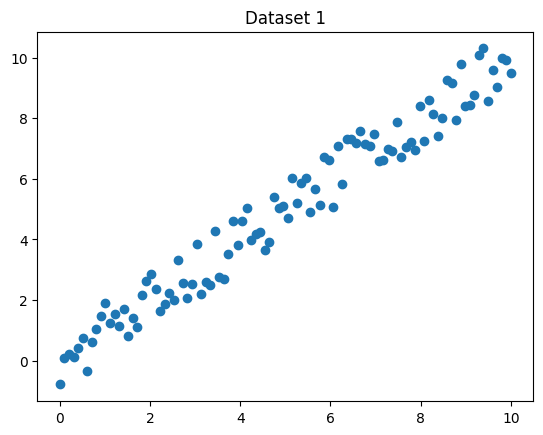

In [4]:
# Датасет 1
xs1 = np.linspace(0, 10, 100)
ys1 = xs1 + np.random.random(100)*2 - 1

plt.scatter(xs1, ys1)
plt.title("Dataset 1")
plt.show()

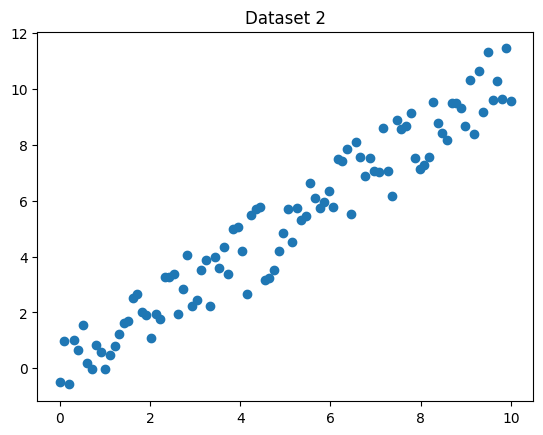

In [5]:
# Датасет 2
xs2 = np.linspace(0, 10, 100)
ys2 = 1.1*xs2 + np.random.random(100)*3 - 2
plt.scatter(xs2, ys2)
plt.title("Dataset 2")
plt.show()

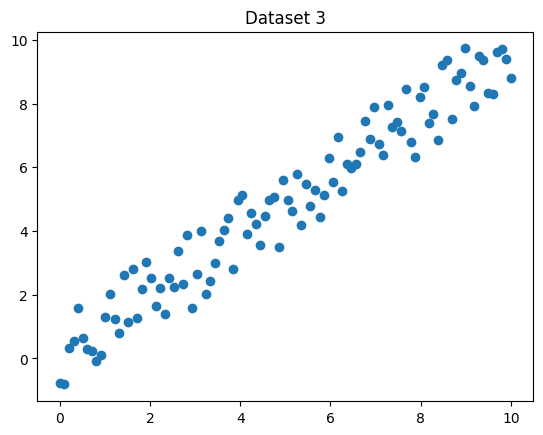

In [6]:
# Датасет 3
xs3 = np.linspace(0, 10, 100)
ys3 = 0.95*xs3 + np.random.random(100)*2.5 - 1.2
plt.scatter(xs3, ys3)
plt.title("Dataset 3")
plt.show()

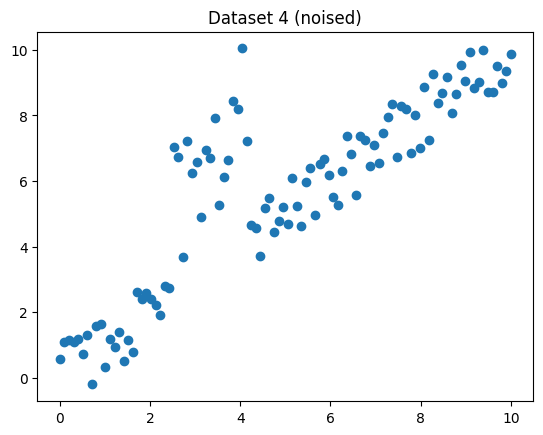

In [7]:
# Датасет 4 (с шумами)
xs4 = np.linspace(0, 10, 100)
ys4 = xs4 + np.random.random(100)*2 - 1
ys4[25:42] *= 2
plt.scatter(xs4, ys4)
plt.title("Dataset 4 (noised)")
plt.show()

###Шаг 2: Обучение модели линейной регрессии на одном из датасетов

In [8]:
X_train = xs1.reshape(-1, 1)
y_train = ys1

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

###Шаг 3: Анализ качества предсказания

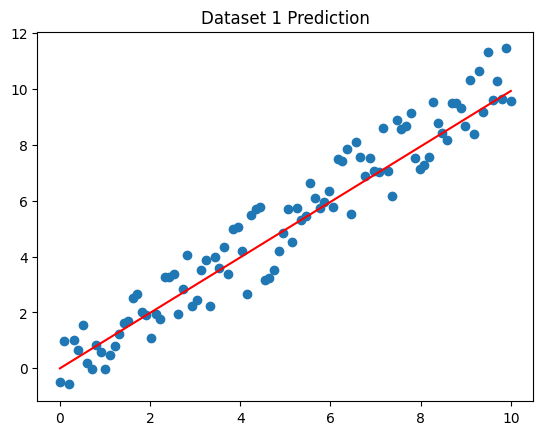

MSE for Dataset 1: 0.72
R2 for Dataset 1: 0.93
Coefficients for Dataset 1: 0.99



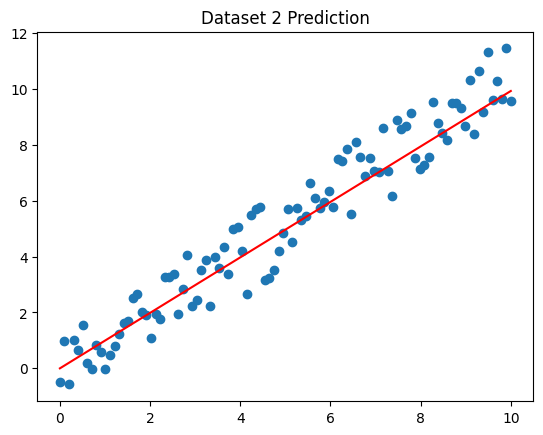

MSE for Dataset 2: 0.72
R2 for Dataset 2: 0.93
Coefficients for Dataset 2: 0.99



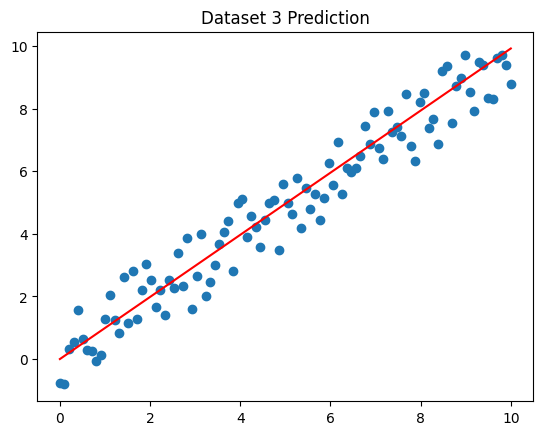

MSE for Dataset 3: 0.52
R2 for Dataset 3: 0.94
Coefficients for Dataset 3: 0.99



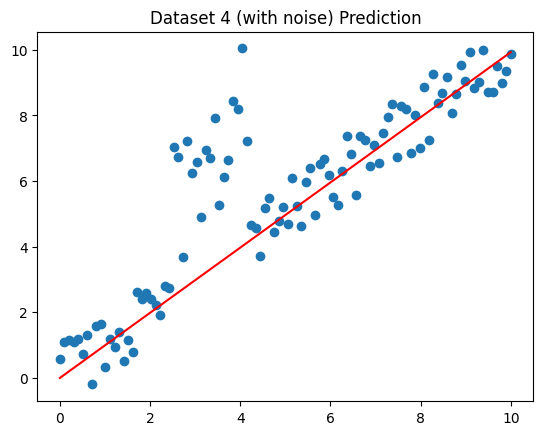

MSE for Dataset 4 (with noise): 2.68
R2 for Dataset 4 (with noise): 0.67
Coefficients for Dataset 4 (with noise): 0.99



In [9]:
#	Функция для анализа качества предсказания и записи данных
def analyze_predictions(xs, ys, dataset_name, idx):
  y_pred = model.predict(xs.reshape(-1, 1))

  np.savetxt(f"ys_{idx}.csv", ys, delimiter=",")
  np.savetxt(f"y_pred_{idx}.csv", y_pred, delimiter=",")

  plt.scatter(xs, ys)
  plt.plot(xs.reshape(-1, 1), y_pred, color="red")
  plt.title(f"{dataset_name} Prediction")
  plt.show()

  print(f"MSE for {dataset_name}: %.2f" % mean_squared_error(ys, y_pred))
  print(f"R2 for {dataset_name}: %.2f" % r2_score(ys, y_pred))
  print(f"Coefficients for {dataset_name}: %.2f" % model.coef_)
  print()

#	Анализ качества предсказания на всех датасетах
analyze_predictions(xs1,	ys2,	"Dataset 1",	1)
analyze_predictions(xs2,	ys2,	"Dataset 2",	2)
analyze_predictions(xs3,	ys3,	"Dataset 3",	3)
analyze_predictions(xs4,	ys4,	"Dataset 4 (with noise)", 4)

###Шаг 4: Обнаружение проблемы на датасете 4 (с шумами)

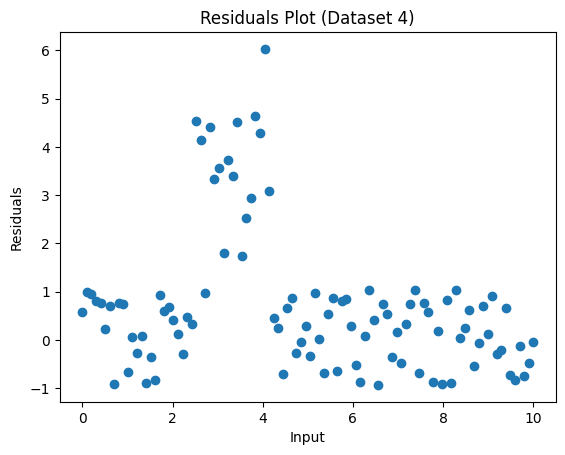

In [10]:
# Анализ остатков модели на датасете 4
y_pred4 = model.predict(xs4.reshape(-1, 1))
residuals = ys4 - y_pred4.flatten()
plt.scatter(xs4, residuals)
plt.xlabel("Input")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Dataset 4)")
plt.show()

Исходя из анализа остатков модели, то есть разницы между фактическими значениями и предсказанными значениями, остатки показывают некоторую структуру или паттерн, что может указывать на проблему в модели или неучтённые факторы в данных. Произведём тестирование данных.

###Шаг 5: Тестирование работы модели на всех 4 датасетах

In [11]:
%%writefile test_score.py
import numpy as np
import pytest
from sklearn.metrics import mean_squared_error, r2_score

@pytest.fixture
def load_ys():
  ys = [np.loadtxt(f"ys_{idx}.csv", delimiter=",") for idx in range(1, 5)]
  return ys

@pytest.fixture
def load_y_pred():
  y_pred = [np.loadtxt(f"y_pred_{idx}.csv", delimiter=",") for idx in range(1, 5)]
  return(y_pred)

def test_mse(load_ys, load_y_pred):
  for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
    assert mean_squared_error(ys, y_pred) < 1, f"Test failed for file: ys_{idx}.csv"

def test_r2(load_ys, load_y_pred):
  for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
    assert r2_score(ys, y_pred) > 0.9, f"Test failed for file: ys_{idx}.csv"

Writing test_score.py


In [12]:
!cat test_score.py

import numpy as np
import pytest
from sklearn.metrics import mean_squared_error, r2_score

@pytest.fixture
def load_ys():
  ys = [np.loadtxt(f"ys_{idx}.csv", delimiter=",") for idx in range(1, 5)]
  return ys

@pytest.fixture
def load_y_pred():
  y_pred = [np.loadtxt(f"y_pred_{idx}.csv", delimiter=",") for idx in range(1, 5)]
  return(y_pred)

def test_mse(load_ys, load_y_pred):
  for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
    assert mean_squared_error(ys, y_pred) < 1, f"Test failed for file: ys_{idx}.csv"

def test_r2(load_ys, load_y_pred):
  for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
    assert r2_score(ys, y_pred) > 0.9, f"Test failed for file: ys_{idx}.csv"


In [13]:
!pytest -v test_score.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.0, pluggy-1.2.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 2 items                                                              

test_score.py::test_mse FAILED                                           [ 50%]
test_score.py::test_r2 FAILED                                            [100%]

=================================== FAILURES ===================================
___________________________________ test_mse ___________________________________

load_ys = [array([-0.50846477,  0.96273278, -0.58091064,  1.01074988,  0.66435903,
        1.54005285,  0.17179805, -0.04448358,...78485,  9.02270853,  9.98649809,  8.70210638,
        8.70759777,  9.50139081,  8.97835885,  9.34222949,  9.876432  ])]
load_y_pred = [array([-3.55808079e-03,  9.67524302e-02,  1.97062941e-01,  2.97373452e-01,
        3.97683963e-01,  4.97

####Юнит-тест

In [14]:
!mkdir test_module

In [15]:
%%writefile test_module/test_unit.py
import numpy as np
import unittest
from sklearn.metrics import mean_squared_error, r2_score


class TestMethods(unittest.TestCase):

  def test_mse(self):
    load_ys = [np.loadtxt(f"ys_{idx}.csv", delimiter=",") for idx in range(1, 5)]
    load_y_pred = [np.loadtxt(f"y_pred_{idx}.csv", delimiter=",") for idx in range(1, 5)]

    for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
      self.assertLess(mean_squared_error(ys, y_pred), 1, f"Test failed for dataset {idx}")

  def test_r2(self):
    load_ys = [np.loadtxt(f"ys_{idx}.csv", delimiter=",") for idx in range(1, 5)]
    load_y_pred = [np.loadtxt(f"y_pred_{idx}.csv", delimiter=",") for idx in range(1, 5)]
    for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
      self.assertGreater(r2_score(ys, y_pred), 0.9, f"Test failed for dataset {idx}")

if __name__ == '__main__':
  unittest.main()


Writing test_module/test_unit.py


In [16]:
!python -m unittest test_module/test_unit.py

FF
FAIL: test_mse (test_module.test_unit.TestMethods)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/test_module/test_unit.py", line 13, in test_mse
    self.assertLess(mean_squared_error(ys, y_pred), 1, f"Test failed for dataset {idx}")
AssertionError: 2.6812105452369703 not less than 1 : Test failed for dataset 4

FAIL: test_r2 (test_module.test_unit.TestMethods)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/test_module/test_unit.py", line 19, in test_r2
    self.assertGreater(r2_score(ys, y_pred), 0.9, f"Test failed for dataset {idx}")
AssertionError: 0.6703156610653298 not greater than 0.9 : Test failed for dataset 4

----------------------------------------------------------------------
Ran 2 tests in 0.006s

FAILED (failures=2)
